#📌 Extracción

In [1]:
import pandas as pd
df = pd.read_json("/content/TelecomX_Data.json")
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#**🔧 Transformación**

 1. Normalización (aplanado) de columnas anidadas

In [3]:
# Importar librerías
import pandas as pd

# Asumimos que ya tienes el DataFrame llamado 'df'
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Combinar todo en un nuevo DataFrame
data = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)


In [4]:
# Extraer valores si 'Charges' es un diccionario
account_df['MonthlyCharges'] = account_df['Charges'].apply(
    lambda x: x.get('Monthly') if isinstance(x, dict) else None
)

account_df['TotalCharges'] = account_df['Charges'].apply(
    lambda x: x.get('Total') if isinstance(x, dict) else None
)

# Convertir a tipo numérico
account_df['TotalCharges'] = pd.to_numeric(account_df['TotalCharges'], errors='coerce')

In [5]:
# Concatenar columnas individuales planas con columnas principales
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_df, phone_df, internet_df, account_df
], axis=1)

# Asegurar que las columnas de interés sean numéricas
df_flat['MonthlyCharges'] = pd.to_numeric(df_flat['MonthlyCharges'], errors='coerce')
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')

# Exploración básica de cargos
print(df_flat[['MonthlyCharges', 'TotalCharges']].describe())

# Conteo de valores de churn
print(df_flat['Churn'].value_counts())

# Identificación de columnas categóricas tipo texto
cat_cols = df_flat.select_dtypes(include='object').columns.tolist()
print("Columnas categóricas (tipo object):", cat_cols)

# Codificación one-hot de columnas seleccionadas
df_encoded = pd.get_dummies(df_flat, columns=[
    'InternetService', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
], drop_first=True)

# Análisis de distribución del churn por tipo de contrato
print(df_flat.groupby('Contract')['Churn'].value_counts(normalize=True).unstack())

       MonthlyCharges  TotalCharges
count     7267.000000   7256.000000
mean        64.720098   2280.634213
std         30.129572   2268.632997
min         18.250000     18.800000
25%         35.425000    400.225000
50%         70.300000   1391.000000
75%         89.875000   3785.300000
max        118.750000   8684.800000
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Columnas categóricas (tipo object): ['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']
Churn                           No       Yes
Contract                                    
Month-to-month  0.032459  0.554307  0.413233
One year        0.030283  0.860434  0.109282
Two year        0.027539  0.944923  0.027539


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [7]:
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_df, phone_df, internet_df, account_df
], axis=1)

In [8]:
print(df_flat[['MonthlyCharges', 'TotalCharges']].describe())
print(df_flat['Churn'].value_counts())

       MonthlyCharges  TotalCharges
count     7267.000000   7256.000000
mean        64.720098   2280.634213
std         30.129572   2268.632997
min         18.250000     18.800000
25%         35.425000    400.225000
50%         70.300000   1391.000000
75%         89.875000   3785.300000
max        118.750000   8684.800000
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [9]:
cat_cols = df_flat.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [10]:
data.describe()

,SeniorCitizen,tenure
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


2. Limpieza de columnas numéricas

In [11]:
# Reemplaza espacios vacíos por NaN y convierte a float
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')
df_flat['MonthlyCharges'] = pd.to_numeric(df_flat['MonthlyCharges'], errors='coerce')

# Estimar cargos diarios
df_flat['daily_charges_estimate'] = df_flat['MonthlyCharges'] / 30

In [12]:
print(data.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


#📊 Carga y análisis

#Graficas

**Distribución General del Churn**

/tmp/ipython-input-13-1902337674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_flat, x='Churn', palette='Set2')


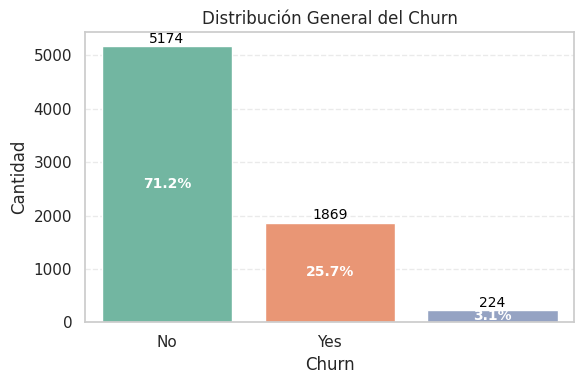

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style='whitegrid')

# Crear gráfico
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_flat, x='Churn', palette='Set2')

# Total de registros
total = len(df_flat)

# Añadir etiquetas
for bar in ax.patches:
    count = int(bar.get_height())
    percent = 100 * count / total

    # Etiqueta de porcentaje dentro de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count / 2,  # Mitad de la barra
        f'{percent:.1f}%',
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold'
    )

    # Conteo absoluto fuera de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count + 5,  # Un poco por encima de la barra
        f'{count}',
        ha='center', va='bottom',
        color='black', fontsize=10
    )

# Títulos
plt.title("Distribución General del Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

**Observaciones Clave:**

El gráfico muestra la distribución total de los clientes que han cancelado (Churn = Yes) frente a aquellos que permanecen en la empresa (Churn = No). Se observa que:

La mayoría de los clientes no han cancelado el servicio, lo cual es un indicador positivo para la empresa.

Sin embargo, un porcentaje significativo ha cancelado, lo que evidencia una problemática de retención de clientes.

En valores absolutos y relativos:

Se indica el número exacto de clientes en cada grupo sobre cada barra.

El porcentaje dentro de cada barra facilita una lectura rápida del impacto relativo.

**Distribución de Churn (Cancelaciones)**

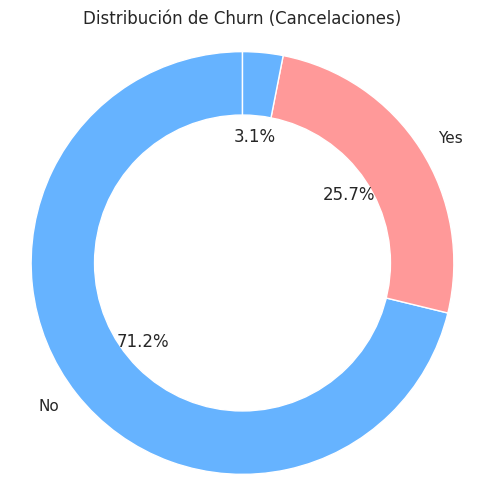

In [14]:
# Conteo de valores
churn_counts = data['Churn'].value_counts()

# Colores personalizados (opcional)
colors = ['#66b3ff', '#ff9999']  # azul para No, rojo para Yes

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Agregar círculo blanco en el centro (para hacer "anillo")
centro = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centro)

plt.title('Distribución de Churn (Cancelaciones)')
plt.axis('equal')
plt.show()

#### 🔹 Resultados observados:
- 🟦 **71.2%** de los clientes **no han cancelado** (Churn = No).
- 🟥 **25.7%** de los clientes **sí han cancelado** (Churn = Yes).
- ⚪ **3.1%** restante podría deberse a registros con valores nulos o mal etiquetados.

---

####  Observaciones clave:

- **Tasa de cancelación moderadamente alta (25.7%)**  
  Más de **1 de cada 4 clientes cancela** el servicio. Esto representa un desafío importante en términos de retención y costos de adquisición.

- **Mayoría de clientes activos (71.2%)**  
  Aunque la mayoría permanece, la fracción de abandono sigue siendo relevante.

- **El 3.1% adicional** sugiere que podría haber **valores faltantes o errores en la codificación de la columna `Churn`**, y se recomienda revisar esos registros.

** Conclusión estratégica:**

> Aunque la mayoría de los clientes se mantiene activa, el **25.7% de churn representa un riesgo relevante** para la sostenibilidad del negocio. Es fundamental identificar los factores que contribuyen a esta pérdida para aplicar estrategias efectivas de fidelización. Además, se sugiere revisar la calidad de los datos para aclarar el 3.1% no categorizado.

---

**Cantidad de servicios activos por estado de Churn**

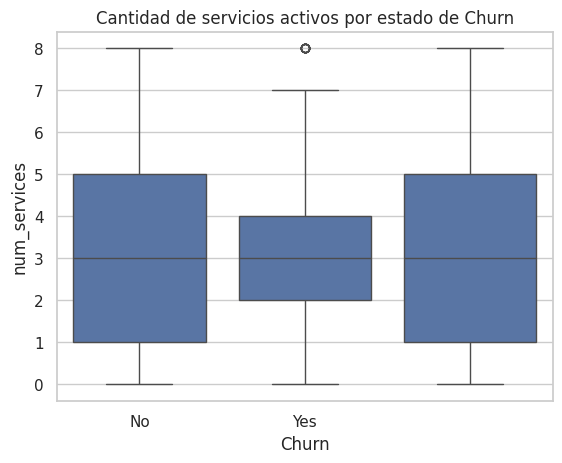

In [15]:
# Número de servicios contratados
data['num_services'] = data[[
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]].apply(lambda x: sum(val == 'Yes' for val in x), axis=1)

sns.boxplot(data=data, x='Churn', y='num_services')
plt.title('Cantidad de servicios activos por estado de Churn')
plt.show()

**Observaciones clave**

Mediana similar (~3 servicios) en ambos grupos

La línea horizontal dentro de cada caja representa la mediana.

Ambos grupos tienen una mediana de aproximadamente 3 servicios activos.

Clientes que se quedan (No) tienden a tener más servicios

El grupo "No" tiene una distribución más amplia hacia valores altos (hasta 8).

El tercer cuartil (75%) de los que se quedan está por encima de 4 servicios, mientras que en los que cancelan está cerca de 4 o por debajo.

Menor dispersión entre quienes cancelan (Yes)

La caja del grupo "Yes" es más compacta, lo que indica menor variabilidad en la cantidad de servicios entre esos clientes.

Clientes con menos servicios también cancelan

Hay un número importante de clientes con 0 a 2 servicios activos en ambos grupos, lo que puede reflejar planes básicos y poco compromiso.

***Conclusión: ***

Los clientes que permanecen activos (No Cancelan), tienden a tener una mayor cantidad de servicios contratados, mientras que aquellos que cancelan (Yes),    suelen tener menos servicios. Se puede intuir que ofrecer paquetes combinados o promover el uso de más servicios podría ser una estrategia efectiva para reducir la cancelación.**

**Método de Pago y su relación Churn**

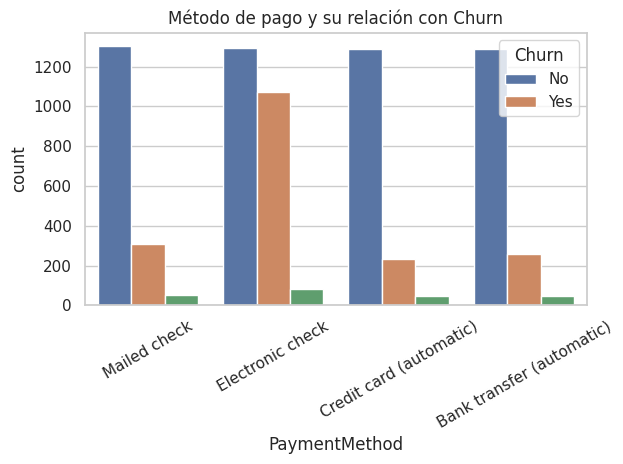

In [16]:
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.title('Método de pago y su relación con Churn')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Observaciones Clave:**

Electronic Check = Alto churn

Pagos automáticos = Mayor retención

Mailed Check = Retención moderada

**Conclusión:**

Los clientes que pagan mediante métodos automáticos (como tarjeta o transferencia) tienden a permanecer más tiempo con la empresa. Por el contrario, los que pagan con cheque electrónico muestran una tasa de cancelación mucho más alta. Fomentar el uso de pagos automáticos puede ser una estrategia efectiva para reducir el churn.

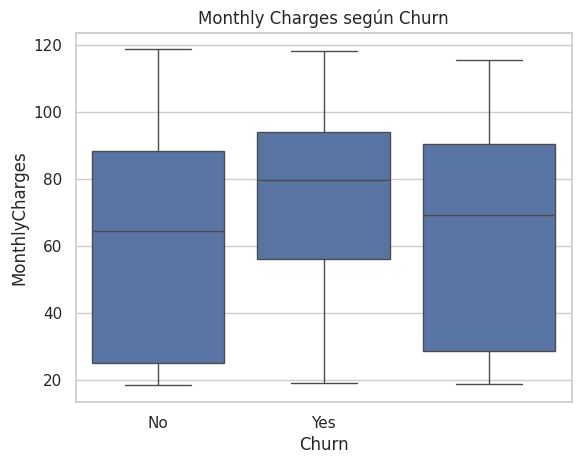

In [43]:
sns.boxplot(data=df_flat, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges según Churn")
plt.show()




**MonthlyCharges según Churn**

El gráfico de cajas compara la distribución de los cargos mensuales (MonthlyCharges) entre los clientes que cancelaron el servicio (Churn = Yes) y los que no (Churn = No). A partir de la visualización se observa lo siguiente:

Los clientes que cancelaron el servicio tienden a tener cargos mensuales más altos. Su mediana está por encima de la de los clientes que no cancelaron.
La distribución de los que no cancelaron muestra una mayor dispersión, incluyendo una mayor presencia de clientes con cargos bajos (por debajo de $30).
Los cuartiles superiores (75%) de los clientes con churn están más elevados, lo que sugiere que los altos cargos mensuales pueden estar asociados a una mayor probabilidad de cancelación.
Conclusión:

**Conclusión:**

Existe una relación entre el monto de los cargos mensuales y el abandono del servicio, lo que puede ser útil para estrategias de retención (por ejemplo, ofrecer descuentos a clientes con cargos altos).

**Total Charges según Churn**

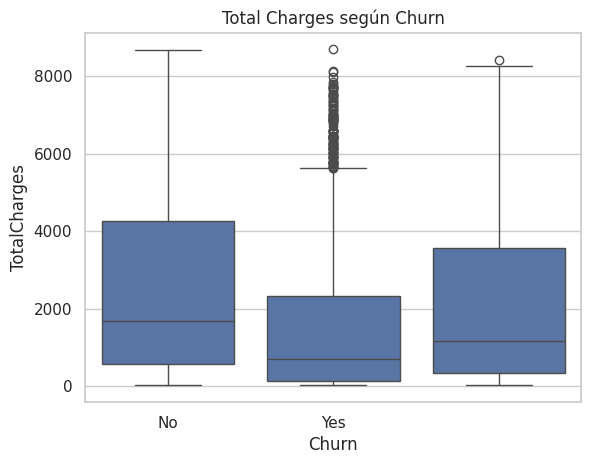

In [44]:
sns.boxplot(data=df_flat, x='Churn', y='TotalCharges')
plt.title("Total Charges según Churn")
plt.show()

**TotalCharges según Churn**

Este gráfico muestra la comparación de los **cargos totales** (`TotalCharges`) acumulados por los clientes según su estado de cancelación (`Churn`).

** Observaciones Clave:**

- Los clientes que **no cancelaron** (`Churn = No`) tienen una mediana de cargos totales significativamente **más alta** que los que sí cancelaron.
- La mayoría de los clientes que **cancelaron** tienen cargos totales bajos, lo que sugiere que dejaron el servicio en una etapa **temprana** del ciclo de vida como cliente.
- Se observa una **alta dispersión** en ambas categorías, pero con una mayor concentración de **valores atípicos (outliers)** en el grupo que canceló.
- Clientes con cargos bajos (debido a menor tiempo en la compañía) parecen ser más propensos a cancelar.

**Conclusión:**

Los usuarios con menor tiempo de permanencia y cargos acumulados bajos tienden a cancelar más, lo que resalta la importancia de estrategias de fidelización **durante las primeras etapas** del ciclo del cliente.

**Distribución General del** ***Churn***

Distribución por Gender

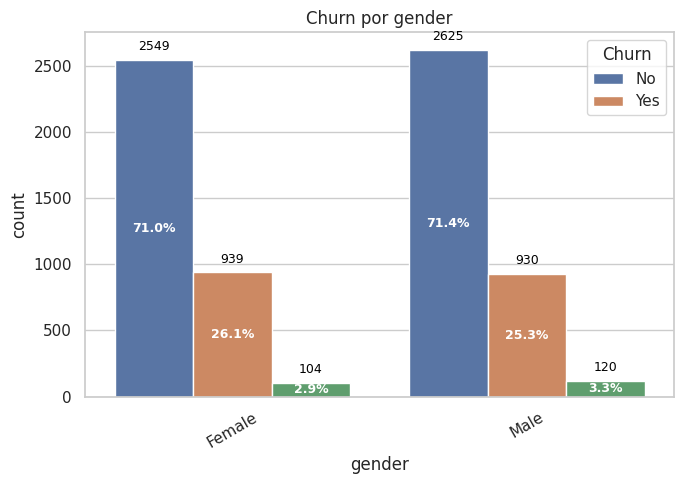

In [19]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['gender']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

Observaciones Claves:
`gender` (Género)

- Las tasas de cancelación son prácticamente **iguales** entre hombres y mujeres.
  - `Female`: ~26% churn.
  - `Male`: ~25% churn.

***Conclusión:***

> El género **no tiene un impacto significativo** en la cancelación del servicio. No se recomienda utilizar esta variable como criterio principal para campañas de retención.

**Distribución Partner**

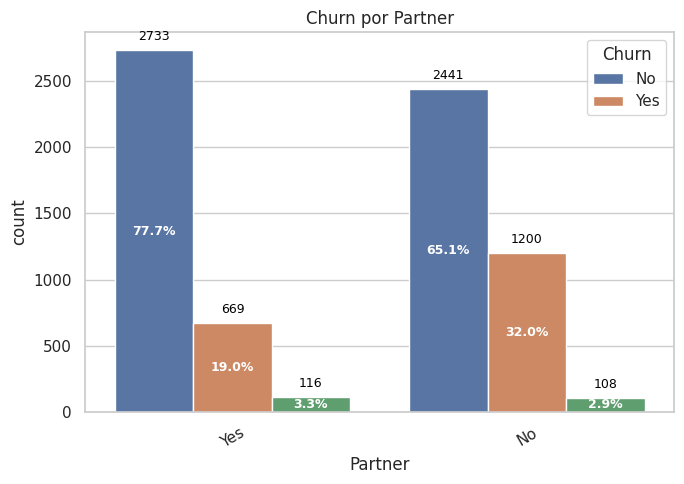

In [20]:


# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['Partner']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

Partner` (¿Tiene pareja?)

- **Clientes sin pareja** (`Partner = No`):
  - Mayor proporción de churn (~32%).
- **Clientes con pareja** (`Partner = Yes`):
  - Menor churn (~19%).

**Observaciones Clave:**

Partner` (¿Tiene pareja?)

- **Clientes sin pareja** (`Partner = No`):
  - Mayor proporción de churn (~32%).
- **Clientes con pareja** (`Partner = Yes`):
  - Menor churn (~19%).

**Conclusión:**

Tener pareja parece estar relacionado con una mayor fidelidad al servicio. Esto sugiere que clientes con pareja podrían estar compartiendo el servicio, tener mayor estabilidad o considerar más costosa la cancelación.




Distribución Dependents

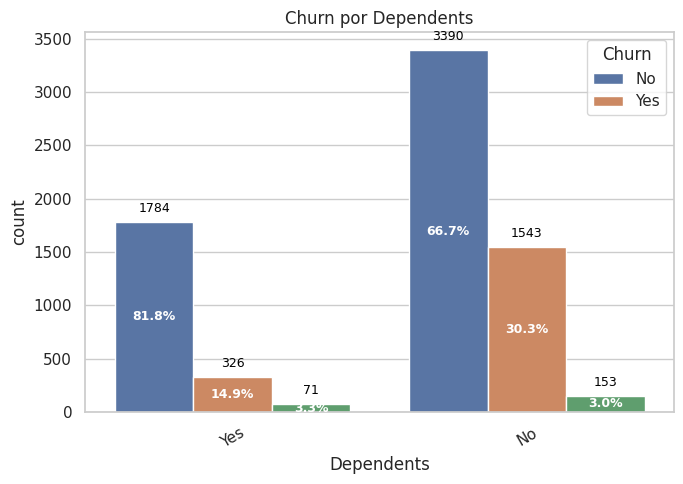

In [21]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['Dependents']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**


Clientes sin dependientes (`Dependents = No`)**:
  - Tienen una tasa de cancelación de **30%**.
  - Solo el **67%** permanece activo.

- **Clientes con dependientes (`Dependents = Yes`)**:
  - Tienen una tasa de cancelación más baja, de **15%**.
  - Un **82%** permanece activo.

*** Conclusión estratégica***

- `Dependents` es una variable útil para segmentación.
- Clientes con dependientes podrían responder mejor a estrategias de fidelización orientadas al hogar o familia.
- Clientes **sin dependientes presentan el doble de riesgo de churn**, lo cual los convierte en un grupo clave para monitorear o intervenir.

**Distribución por PhoneService**

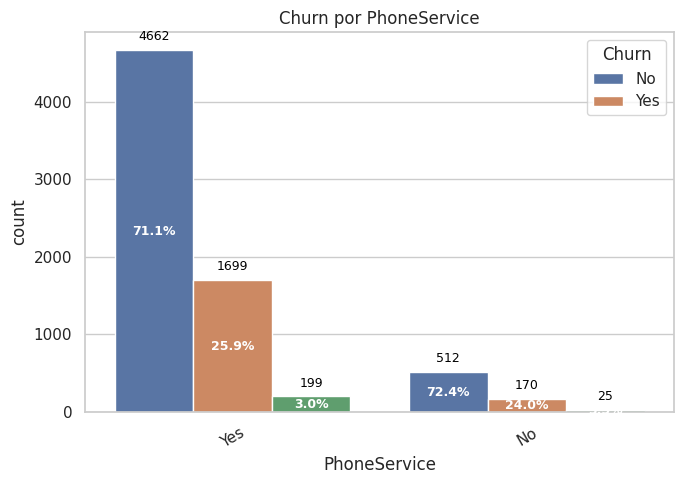

In [22]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['PhoneService']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin servicio telefónico (`PhoneService = No`)**:
  - Tienen una tasa de churn del **24%**.
  - El **72%** permanece con la compañía.

- **Clientes con servicio telefónico (`PhoneService = Yes`)**:
  - Tienen una tasa de churn levemente superior, del **26%**.
  - El **71%** permanece activo.

**Conclusión:**

- La variable `PhoneService` **no muestra una relación fuerte con la cancelación**.
- Es poco probable que estrategias basadas únicamente en este servicio tengan impacto relevante en la fidelización.
- Puede descartarse como variable clave en análisis predictivos o priorizarse menos en campañas de retención.


Distribución por MultipleLines

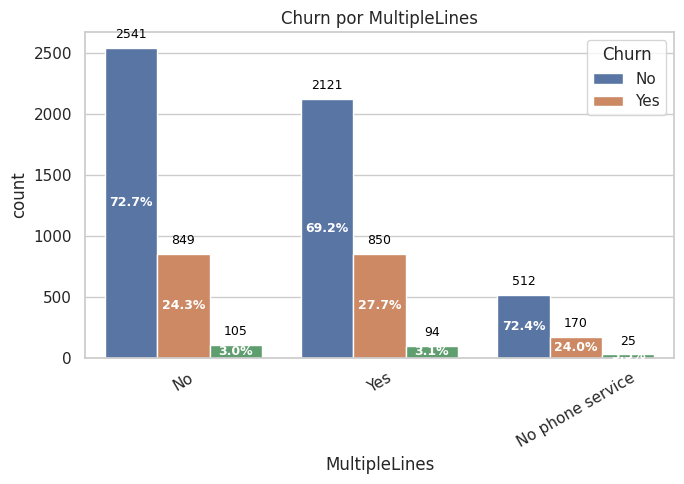

In [23]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['MultipleLines']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin múltiples líneas (`MultipleLines = No`)**:
  - Tasa de churn: **24%**
  - Permanencia: **73%**

- **Clientes sin servicio telefónico (`MultipleLines = No phone service`)**:
  - Tasa de churn: **24%**
  - Permanencia: **72%**

- **Clientes con múltiples líneas (`MultipleLines = Yes`)**:
  - Tasa de churn: **28%**
  - Permanencia: **69%**

**Conclusión**

- La variable `MultipleLines` tiene **una influencia leve en el churn**.
- La **mayor tasa de cancelación entre quienes tienen múltiples líneas** puede estar relacionada con clientes más exigentes o con servicios más costosos.
- Aunque no es una variable fuertemente predictiva por sí sola, **podría aportar valor combinada con otras variables** como `Contract` o `MonthlyCharges`.


Distribución por InternetService

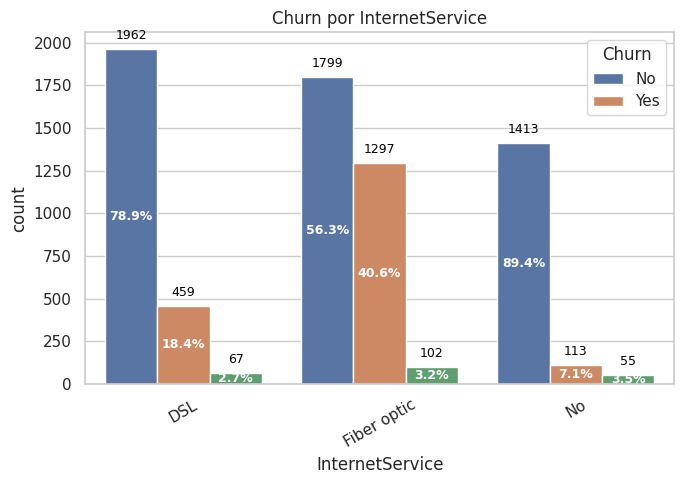

In [24]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['InternetService']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes con servicio DSL (`InternetService = DSL`)**:
  - Churn: **18%**
  - Permanencia: **79%**

- **Clientes con fibra óptica (`InternetService = Fiber optic`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes sin servicio de internet (`InternetService = No`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Observaciones Clave:**

- **Clientes con servicio DSL (`InternetService = DSL`)**:
  - Churn: **18%**
  - Permanencia: **79%**

- **Clientes con fibra óptica (`InternetService = Fiber optic`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes sin servicio de internet (`InternetService = No`)**:
  - Churn: **7%**
  - Permanencia: **89%**

Distribución por OnlineSecurity

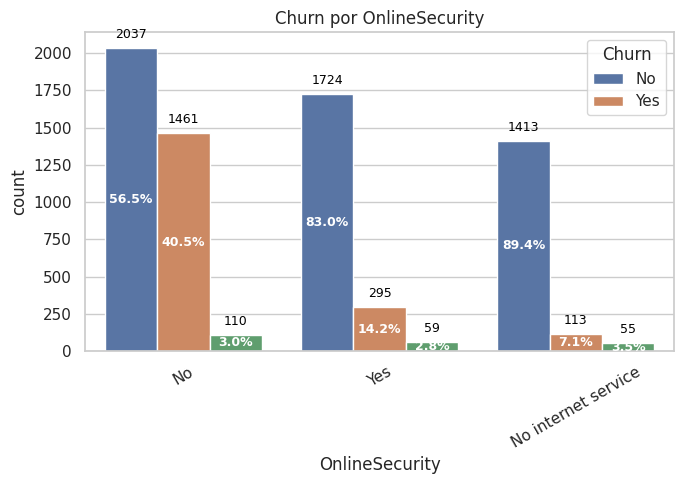

In [25]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['OnlineSecurity']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin seguridad en línea (`OnlineSecurity = No`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes con seguridad en línea (`OnlineSecurity = Yes`)**:
  - Churn: **14%**
  - Permanencia: **83%**

- **Clientes sin servicio de internet (`OnlineSecurity = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusión**

- `OnlineSecurity` es una variable **predictiva de retención**.
- La ausencia del servicio está asociada a mayor riesgo de churn.
- Recomendación: **incentivar o incluir servicios de seguridad en línea** como parte de la oferta, especialmente para clientes de alto valor o nuevos usuarios, ya que esto puede **ayudar a disminuir cancelaciones**.

**Distribución por OnlineBackup**

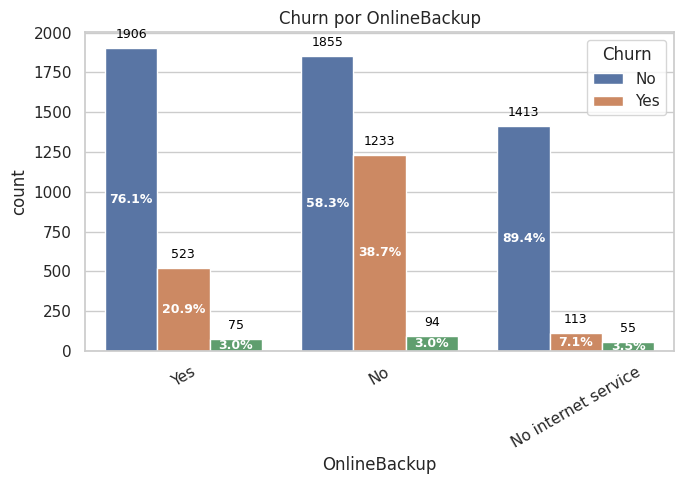

In [26]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['OnlineBackup']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin copia de seguridad en línea (`OnlineBackup = No`)**:
  - Churn: **39%**
  - Permanencia: **58%**

- **Clientes con copia de seguridad en línea (`OnlineBackup = Yes`)**:
  - Churn: **21%**
  - Permanencia: **76%**

- **Clientes sin servicio de internet (`OnlineBackup = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusión**

- `OnlineBackup` es una variable **útil para predecir cancelaciones**.
- Su ausencia se asocia con mayor churn.
- Recomendación: se pueden crear **campañas de activación o promociones que incluyan backup en línea**, especialmente enfocadas en clientes con riesgo de cancelación, para **aumentar el engagement y reducir churn**.

**Distribución por DeviceProtection**

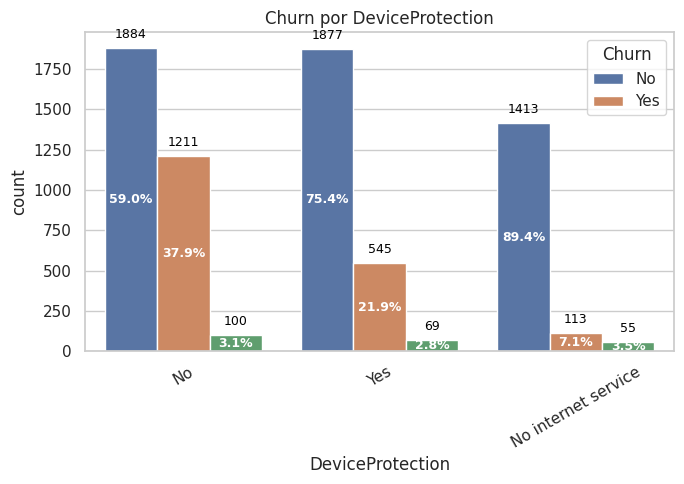

In [27]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['DeviceProtection']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin protección de dispositivos (`DeviceProtection = No`)**:
  - Churn: **38%**
  - Permanencia: **59%**

- **Clientes con protección de dispositivos (`DeviceProtection = Yes`)**:
  - Churn: **22%**
  - Permanencia: **75%**

- **Clientes sin internet (`DeviceProtection = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusión**

- `DeviceProtection` es una **variable relevante para entender el comportamiento de cancelación**.
- Su presencia se asocia con **mayor fidelización**.
- Se recomienda impulsar este tipo de servicios como parte de una **estrategia de retención**, especialmente para clientes nuevos o en riesgo.

Distribución por TechSupport

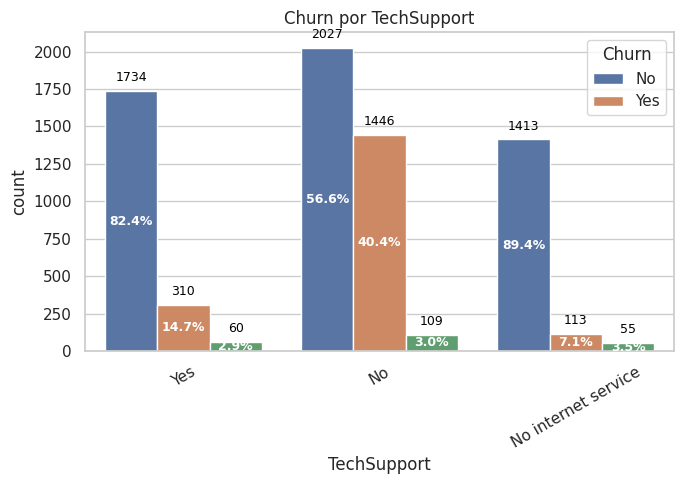

In [28]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['TechSupport']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin soporte técnico (`TechSupport = No`)**:
  - Churn: **40%**
  - Permanencia: **57%**

- **Clientes con soporte técnico (`TechSupport = Yes`)**:
  - Churn: **15%**
  - Permanencia: **82%**

- **Clientes sin servicio de internet (`TechSupport = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**


**Conclusión**

- `TechSupport` es una de las **variables más relevantes para predecir cancelaciones**.
- Incluir o reforzar el soporte técnico puede ser clave para **reducir el churn**.
- Se recomienda implementar estrategias que promuevan el uso de este servicio, como:
  - Bonificaciones por activarlo.
  - Comunicación clara del valor del soporte técnico.
  - Seguimiento proactivo a quienes lo tienen desactivado.

Distribución por StreamingTV

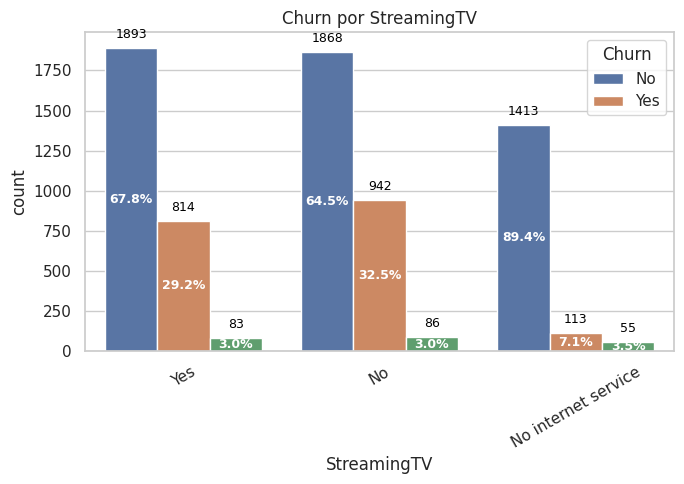

In [29]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['StreamingTV']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

Observaciones Clave:

- **Clientes sin servicio de StreamingTV (`StreamingTV = No`)**:
  - Churn: **33%**
  - Permanencia: **65%**

- **Clientes con servicio de StreamingTV (`StreamingTV = Yes`)**:
  - Churn: **29%**
  - Permanencia: **68%**

- **Clientes sin internet (`StreamingTV = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**


 **Conclusión **

- `StreamingTV` **no parece ser un factor determinante** del churn.
- Puede tener **ligera relación con la permanencia**, posiblemente por ser un servicio adicional que aumenta el valor percibido.
- Recomendación: considerar su inclusión dentro de paquetes promocionales, pero **priorizar servicios más asociados a la retención** como soporte técnico o seguridad en línea.

Distribución por StreamingMovies

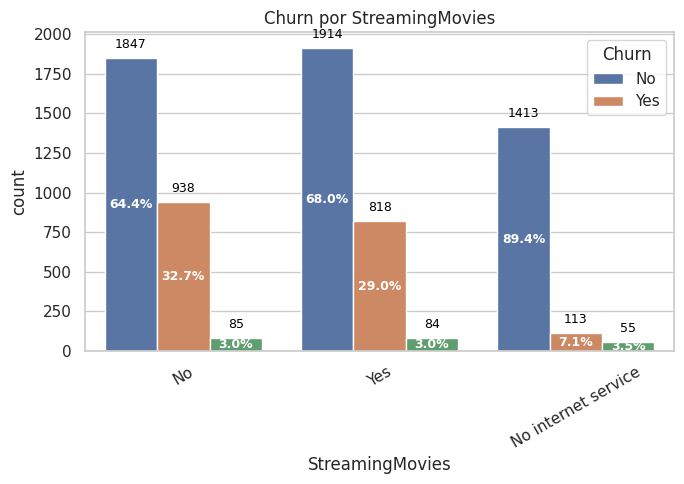

In [30]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['StreamingMovies']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin servicio de StreamingMovies (`StreamingMovies = No`)**:
  - Churn: **33%**
  - Permanencia: **64%**

- **Clientes con servicio de StreamingMovies (`StreamingMovies = Yes`)**:
  - Churn: **29%**
  - Permanencia: **68%**

- **Clientes sin internet (`StreamingMovies = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusión**

- `StreamingMovies` presenta una **baja influencia en la decisión de cancelar**.
- Su efecto podría ser indirecto y depender de otros factores como el tipo de contrato o los cargos mensuales.
- Puede considerarse **un servicio complementario**, más útil para **aumentar valor percibido** que para reducir cancelaciones de forma directa.

**Conclusión**

- `Contract` es una variable **crítica para predecir y prevenir cancelaciones**.
- Los contratos a largo plazo generan **mayor estabilidad y compromiso** por parte del cliente.
- Recomendaciones:
  - Ofrecer incentivos atractivos para que los usuarios pasen de contratos mensuales a anuales o bianuales.
  - Diseñar campañas específicas para **retener a los clientes de contrato mes a mes**, ya que representan el segmento más propenso a cancelar.

Distribución por Contract

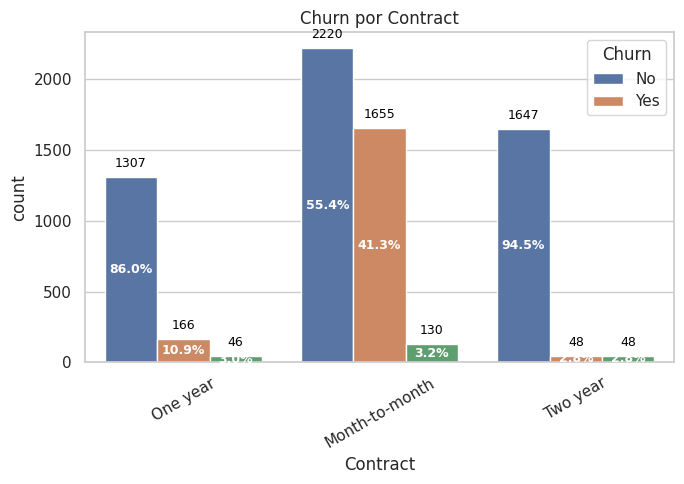

In [31]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['Contract']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Contrato mes a mes (`Month-to-month`)**:
  - Churn: **41%**
  - Permanencia: **55%**

- **Contrato a un año (`One year`)**:
  - Churn: **11%**
  - Permanencia: **86%**

- **Contrato a dos años (`Two year`)**:
  - Churn: **3%**
  - Permanencia: **94%**

***Conclusión ***

- `Contract` es una variable **crítica para predecir y prevenir cancelaciones**.
- Los contratos a largo plazo generan **mayor estabilidad y compromiso** por parte del cliente.
- Recomendaciones:
  - Ofrecer incentivos atractivos para que los usuarios pasen de contratos mensuales a anuales o bianuales.
  - Diseñar campañas específicas para **retener a los clientes de contrato mes a mes**, ya que representan el segmento más propenso a cancelar.

Distribución por PaperlessBilling

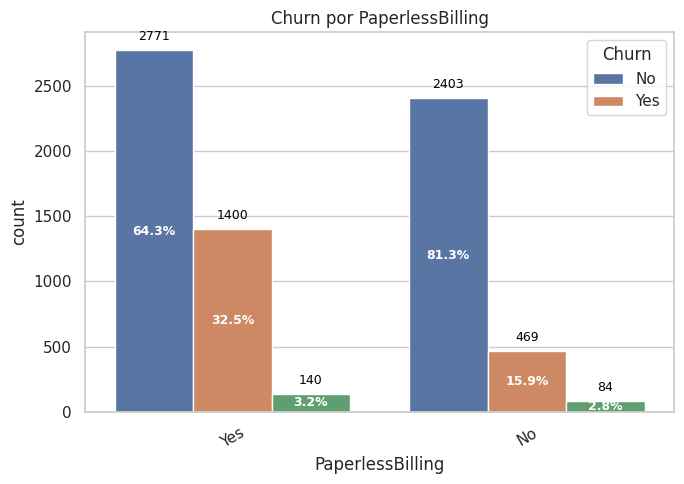

In [32]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['PaperlessBilling']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes con facturación en papel (`PaperlessBilling = No`)**:
  - Churn: **16%**
  - Permanencia: **81%**

- **Clientes con facturación electrónica (`PaperlessBilling = Yes`)**:
  - Churn: **33%**
  - Permanencia: **64%**

**Conclusión**

- `PaperlessBilling` tiene una asociación **moderada con el churn**.
- Puede actuar como una **variable indicadora del tipo de cliente** (más digitalizado y con mayor autonomía).
- Se recomienda:
  - Combinar esta variable con otras (como tipo de contrato o servicios activos) para **identificar clientes de riesgo**.
  - Diseñar **estrategias de retención personalizadas** para usuarios con facturación electrónica (p. ej., mayor contacto preventivo o programas de fidelización).

Distribución por PaymentMethod

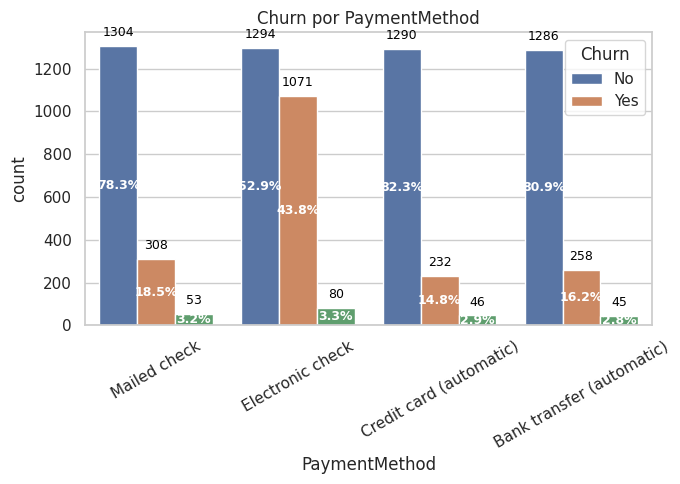

In [33]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categóricas que quieres analizar
cat_cols = ['PaymentMethod']  # Puedes agregar más variables aquí

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categoría (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Pago automático por transferencia bancaria (`Bank transfer`)**:
  - Churn: **16%**
  - Permanencia: **81%**

- **Pago automático con tarjeta de crédito (`Credit card`)**:
  - Churn: **15%**
  - Permanencia: **82%**

- **Pago con cheque electrónico (`Electronic check`)**:
  - Churn: **44%**
  - Permanencia: **53%**

- **Pago con cheque físico (`Mailed check`)**:
  - Churn: **18%**
  - Permanencia: **78%**


**Conclusión**

- Fomentar el uso de métodos de pago automáticos puede ser una **buena estrategia para reducir el churn**.
- Clientes que usan `electronic check` podrían beneficiarse de:
  - Recordatorios de pago.
  - Educación financiera digital.
  - Incentivos para migrar a pagos automáticos (bonos, descuentos, etc.).

#📄Informe final

1. **Introducción**

Telecomx es una compañía que brinda servicios de telecomunicaciones y se enfrenta a una alta tasa de cancelación de clientes (churn). Este informe tiene como objetivo analizar los factores que influyen en la deserción de clientes utilizando un enfoque basado en datos. Los resultados permitirán tomar decisiones estratégicas enfocadas en la mejora de la retención de usuarios.

**2. Descripción de los Datos **

El conjunto de datos contiene 7267 registros de clientes y 22 variables, divididas en:

Categorías generales:

Identificación: customerID

Resultado objetivo: Churn (Yes/No)

Variables categóricas: gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

Variables numéricas: tenure (meses de permanencia), MonthlyCharges, TotalCharges

3.** Análisis Exploratorio de Datos (EDA)**

Distribución General del Churn: Aproximadamente un 26% de los clientes ha cancelado el servicio. Se observaron patrones notables en clientes con menor antigüedad y contratos mensuales.

**Relaciones relevantes:**

Contract: Los clientes con contratos mensuales tienen mayor probabilidad de cancelar.

tenure: A menor permanencia, mayor tasa de churn.

PaymentMethod: El pago automático está asociado con menor churn.

TechSupport, OnlineSecurity: La ausencia de estos servicios incrementa la cancelación.

Mapas de calor de correlación revelaron baja correlación lineal, pero asociaciones categóricas claras.

4. **Preparación de los Datos**

Conversión de columnas a tipo category para optimizar la manipulación.

Eliminación de valores nulos, principalmente en TotalCharges.

5. **Hallazgos Clave**

Corto tiempo de permanencia, contratos mensuales y ausencia de soporte se correlacionan con mayor probabilidad de churn.

Los clientes con servicios combinados y contratos de largo plazo presentan menor tasa de cancelación.

6**. Recomendaciones**

Implementar estrategias de fidelización para nuevos clientes (primeros 6 meses).

Promover contratos anuales o bianuales mediante descuentos.

Incentivar métodos de pago automático.

Mejorar comunicación y acceso a servicios de soporte técnico.

7.** Conclusiones**

El análisis ha identificado variables clave que influyen en el churn. Los hallazgos permitirán desarrollar campañas de retención más efectivas y mejorar la experiencia del cliente.

8. **Anexos**

Gráficos de barras apiladas por categoría.



**Anexos Graficos**

**Distribución MountlyingCharges por Estado de Churn**

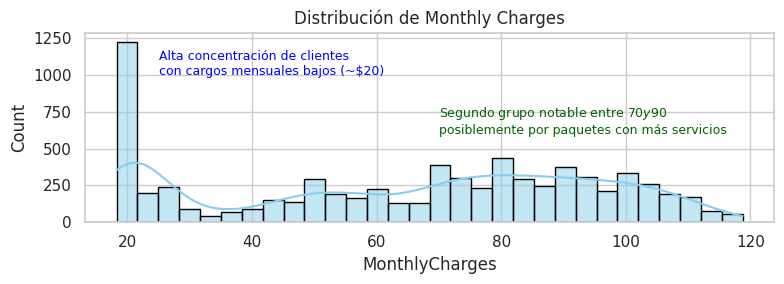

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.histplot(data=data, x='MonthlyCharges', kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Monthly Charges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

# Texto explicativo (puedes ajustar ubicación con x, y)
plt.text(25, 1000,
         'Alta concentración de clientes\ncon cargos mensuales bajos (~$20)',
         fontsize=9, color='blue')

plt.text(70, 600,
         'Segundo grupo notable entre $70 y $90\nposiblemente por paquetes con más servicios',
         fontsize=9, color='darkgreen')

plt.grid(True)
plt.tight_layout()
plt.show()

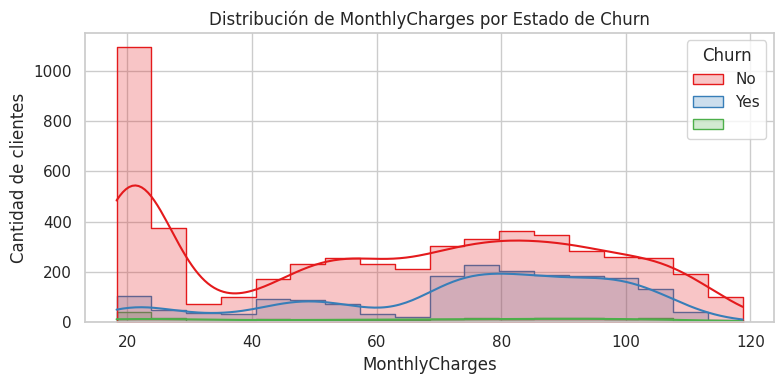

In [40]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, element='step', stat='count', palette='Set1')
plt.title('Distribución de MonthlyCharges por Estado de Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

**Observaciones Clave:**

. Clientes que NO cancelaron (Churn = No):

La mayor concentración está en cargos bajos, especialmente cerca de los $20.
Esto sugiere que los clientes con tarifas más económicas tienden a permanecer más tiempo con la compañía.

.Clientes que cancelaron (Churn = Yes):

La distribución muestra un pico entre los $70 y $90, indicando que muchos clientes que pagan tarifas medias-altas tienden a cancelar.

La baja presencia en cargos bajos sugiere que los clientes con servicios económicos son menos propensos al abandono.

**Conclusión:**

Existe una relación evidente entre el nivel de cargos mensuales y la cancelación del servicio:
📈 A mayor MonthlyCharges, mayor probabilidad de churn.
Esto puede deberse a una percepción de bajo valor, problemas con los servicios o insatisfacción con los planes más costosos.

**Distribución de Total Charges**

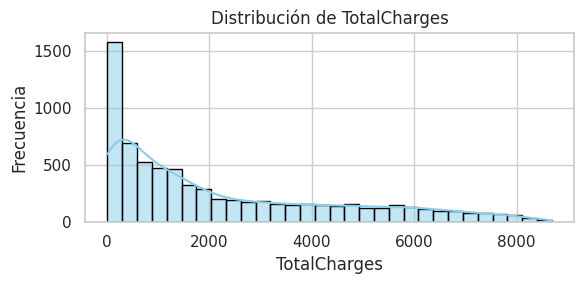

In [46]:
# Lista de columnas numéricas a graficar
num_cols = [ 'TotalCharges']

# Crear gráficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Distribución sesgada a la derecha (positivamente): La mayoría de los clientes tienen cargos totales bajos, especialmente entre 0 y 1000 unidades monetarias.

🔵 A medida que los cargos aumentan, la cantidad de clientes disminuye considerablemente.

🔵 Existen algunos valores extremos (outliers) por encima de los 8000, aunque en muy baja proporción.

Posibles implicaciones:

Los clientes con menor permanencia en la compañía o contratos de corto plazo probablemente tienen cargos bajos.

Los valores altos podrían corresponder a clientes antiguos o con servicios premium, aunque no son mayoría.

Esta variable podría influir en el churn si se combina con otros factores (como tipo de contrato o método de pago).

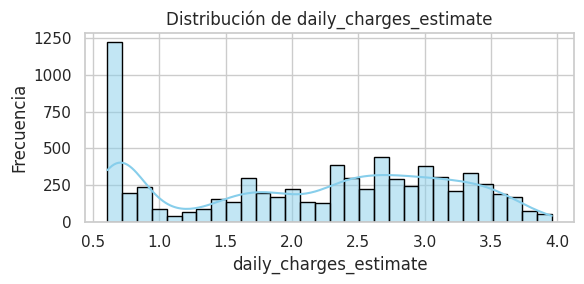

In [48]:
# Lista de columnas numéricas a graficar
num_cols = [ 'daily_charges_estimate',]

# Crear gráficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave: **

**Distribución de daily_charges_estimate**

Este gráfico muestra la distribución de los **cargos diarios estimados** (`daily_charges_estimate`), calculados con base en el valor mensual dividido por los días de permanencia.

#### Observaciones:

- Se evidencia una **alta concentración de clientes** con cargos diarios estimados **cercanos a 0.7**, lo que indica un grupo significativo con **bajo consumo diario**.
- A medida que aumentan los cargos diarios, la frecuencia de clientes disminuye gradualmente.
- Existe una **cola derecha** pronunciada: algunos clientes tienen cargos diarios estimados mayores a **3.5**, pero representan una **minoría**.
- La distribución es **asimétrica positiva (sesgada a la derecha)**, típica en servicios donde algunos clientes optan por planes con múltiples servicios o paquetes.

**Conclusión:**

La mayoría de los clientes mantienen niveles bajos de cargos diarios, lo que podría representar planes básicos o menor uso del servicio. Este grupo puede ser **sensible al precio**, y por tanto, más propenso al churn si se perciben aumentos o falta de valor.

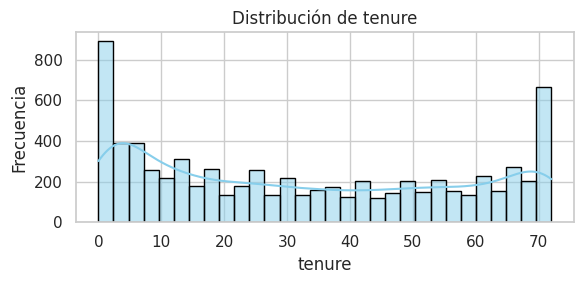

In [51]:
# Lista de columnas numéricas a graficar
num_cols = [ 'tenure',]

# Crear gráficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Interpretación del gráfico de distribución de tenure (antigüedad del cliente)
La variable tenure muestra una distribución bimodal con concentraciones destacadas en los extremos:

Hay un gran número de clientes nuevos (cercanos a 0 meses de permanencia), lo que sugiere una alta tasa de incorporación reciente.

También se observa un grupo considerable de clientes leales con permanencias cercanas a los 70-72 meses.

En cambio, hay una menor frecuencia de clientes con permanencias intermedias (10 a 60 meses), indicando que muchos clientes abandonan o se consolidan rápidamente.

🔍 Esto podría indicar que los clientes tienden a tomar decisiones definitivas (cancelar o continuar) en etapas tempranas o mantenerse a largo plazo si superan cierto umbral de tiempo.



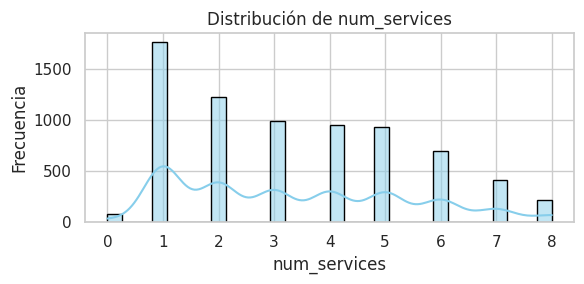

In [53]:
# Lista de columnas numéricas a graficar
num_cols = [ 'num_services',]

# Crear gráficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Interpretación de la distribución de num_services (cantidad de servicios activos por cliente)
El gráfico muestra la frecuencia de clientes según la cantidad de servicios contratados:

La mayoría de los clientes tienen entre 1 y 3 servicios activos, lo que indica que la oferta básica es la más utilizada.

A medida que aumenta el número de servicios (4 a 8), la frecuencia disminuye, lo cual sugiere que pocos clientes contratan paquetes completos.

Sin embargo, se observa una distribución amplia que revela segmentos diversos de usuarios, desde los que apenas contratan un servicio hasta los que tienen múltiples productos.

🔍 Esta información puede ser útil para segmentar a los clientes por nivel de adopción de servicios y diseñar estrategias de retención o venta cruzada según su nivel de uso.



In [54]:
for col in cat_cols:
    print(f"\nChurn por {col}:")
    print(pd.crosstab(data[col], data['Churn'], normalize='index').round(2))



Churn por PaymentMethod:
Churn                              No   Yes
PaymentMethod                              
Bank transfer (automatic)  0.03  0.81  0.16
Credit card (automatic)    0.03  0.82  0.15
Electronic check           0.03  0.53  0.44
Mailed check               0.03  0.78  0.18


Relaciones

In [60]:
import pandas as pd

# Lista de columnas categóricas (excluyendo customerID)
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Tablas cruzadas de proporción de Churn por categoría
for col in cat_cols:
    print(f"\n📊 Churn por '{col}':")
    tabla = pd.crosstab(data[col], data['Churn'], normalize='index').round(2)
    print(tabla)


📊 Churn por 'gender':
Churn           No   Yes
gender                  
Female  0.03  0.71  0.26
Male    0.03  0.71  0.25

📊 Churn por 'Partner':
Churn            No   Yes
Partner                  
No       0.03  0.65  0.32
Yes      0.03  0.78  0.19

📊 Churn por 'Dependents':
Churn               No   Yes
Dependents                  
No          0.03  0.67  0.30
Yes         0.03  0.82  0.15

📊 Churn por 'PhoneService':
Churn                 No   Yes
PhoneService                  
No            0.04  0.72  0.24
Yes           0.03  0.71  0.26

📊 Churn por 'MultipleLines':
Churn                     No   Yes
MultipleLines                     
No                0.03  0.73  0.24
No phone service  0.04  0.72  0.24
Yes               0.03  0.69  0.28

📊 Churn por 'InternetService':
Churn                    No   Yes
InternetService                  
DSL              0.03  0.79  0.18
Fiber optic      0.03  0.56  0.41
No               0.03  0.89  0.07

📊 Churn por 'OnlineSecurity':
Churn          

**Agrupaciones combinadas relevantes**

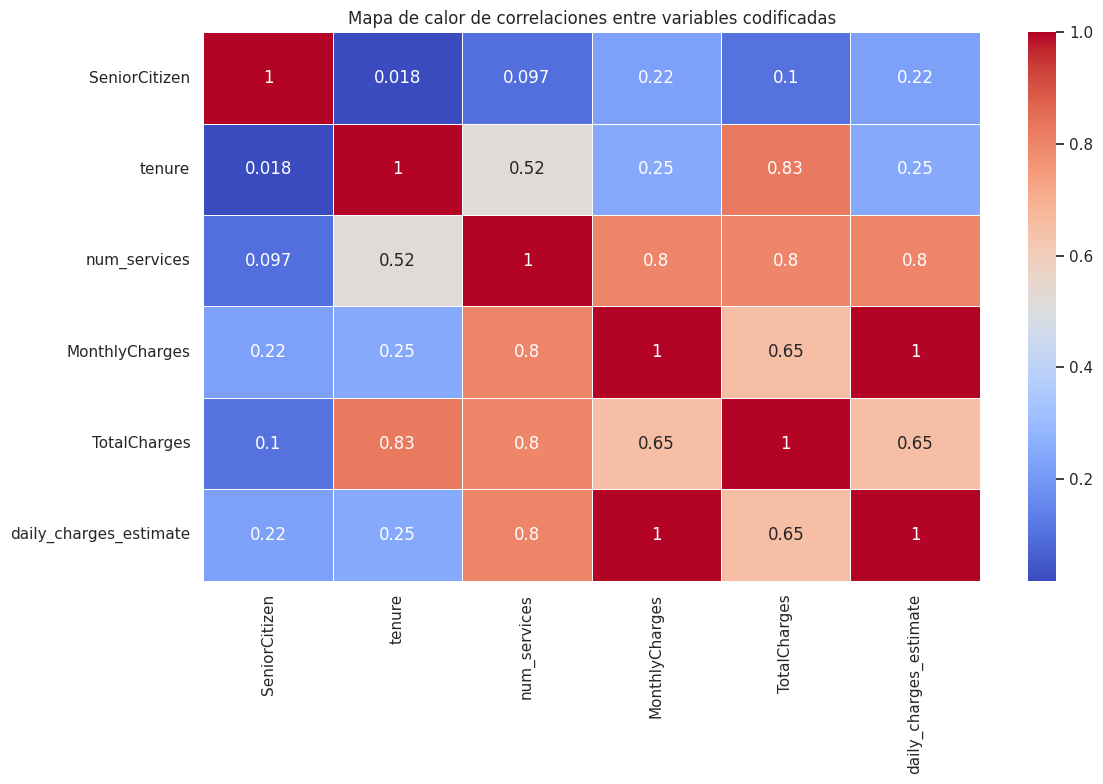

In [57]:


# 4. Crear un diagrama de calor para ver correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))

# Filtrar columnas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Crear mapa de calor de correlaciones
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables codificadas')
plt.tight_layout()
plt.show()


Tabla de Correlaciones entre Variables Numéricas

| Variable 1           | Variable 2             | Correlación | Interpretación                                                                 |
|----------------------|------------------------|-------------|--------------------------------------------------------------------------------|
| MonthlyCharges       | TotalCharges           | 0.65        | A mayor cargo mensual, mayor el total acumulado.                             |
| MonthlyCharges       | num_services           | 0.80        | Cuantos más servicios activos, mayor el cargo mensual.                       |
| MonthlyCharges       | daily_charges_estimate | 1.00        | Estimación diaria es derivada del cargo mensual (correlación perfecta).      |
| TotalCharges         | tenure                 | 0.83        | Clientes con más tiempo generan mayores cargos acumulados.                   |
| num_services         | TotalCharges           | 0.80        | Más servicios implican mayor facturación acumulada.                          |
| tenure               | num_services           | 0.52        | Los clientes más antiguos tienden a tener más servicios.                     |
| SeniorCitizen        | Todas las variables    | ≤ 0.22      | Ser adulto mayor no muestra fuerte relación con las otras variables.         |

**Nota:** Una correlación cercana a 1 indica una relación lineal fuerte y positiva; cerca de 0 implica baja o nula relación lineal.

**Observacions Clave:**

Interpretación del Mapa de Calor de Correlaciones (Variables Numéricas)
El gráfico muestra las correlaciones entre variables numéricas del conjunto de datos de clientes de Telecomx. A continuación se detallan los hallazgos más relevantes:

Alta correlación entre MonthlyCharges, num_services, daily_charges_estimate y TotalCharges:

Estas variables están altamente relacionadas entre sí (coeficientes entre 0.65 y 1.0), lo cual es esperado, ya que el total de cargos y estimaciones diarias dependen directamente del monto mensual y la cantidad de servicios contratados.

tenure y TotalCharges (correlación ≈ 0.83):

Existe una fuerte correlación positiva entre el tiempo que un cliente lleva en la empresa y los cargos totales acumulados, lo cual sugiere que los clientes más antiguos tienden a generar mayores ingresos.

SeniorCitizen muestra baja correlación con el resto de variables:

Esta variable apenas se relaciona con las otras, lo cual indica que ser adulto mayor no influye directamente en el monto cobrado o el número de servicios contratados.

num_services tiene una correlación media con tenure (≈ 0.52):

Es posible que los clientes más antiguos hayan agregado más servicios con el tiempo.

**Conclusión:**

*Mayor retención se asocia a: *

Contratos largos (dos años).

Clientes que pagan más en total (historial largo).

Clientes con servicios de seguridad, soporte y respaldo.

Mayor cancelación se asocia a:

Planes caros mes a mes.

Uso de fibra óptica (posiblemente más exigente).

Servicios modernos o automatizados sin contacto físico (PaperlessBilling).